
# Claude API 调用指南：从入门到精通
在和小伙伴一起coding前，我们可以先浏览了解一下Claude的页面版API调试工具，可以通过它直观的发现调试流程许多功能，参数并易于上手。

## 页面版API调试工具 Anthropic Workbench

Workbench是基于网页的工具API Console中的一个重要功能，允许开发者实验和优化他们的API调用。

Claude API Console：[https://console.anthropic.com](https://console.anthropic.com)
1. 可以快速设计提示
2. 实时调整参数并查看效果（temperature、max token、model）
3. 生成对应的 API 调用代码

![Workbench界面](https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240820161255.png)

主要特性和使用步骤：

- **创建新提示**：使用"+"图标
- **输入提示**：在"User"对话框中
- **配置模型设置**：选择模型、调整temperature、max token、model参数
- **运行测试**：使用"Run"按钮
- **分析输出**：查看Claude的响应
- **调整提示/设置**：根据需要进行修改
- **生成代码示例**：使用"Get code"按钮
- **集成到应用**：将优化后的提示应用到实际项目中

<img alt="Workbench设置" src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240820144650.png"/>

## 掌握Claude API 的coding
###  1. Claude API 调用精髓：一个函数搞定全局——`messages.create()`
接下来我们使用Anthropic原生的Claude API来创建一个对话消息。

首先创建一个Anthropic API的客户端实例，在此我们对此实例命名为client。

首先需要安装anthropic包，如果已经启动kernel，安装后找不到可能需要停止重启才能使用新安装的包

In [ ]:
!pip install anthropic

In [4]:
import anthropic
#第一种方法，在电脑中显性的显示
ANTHROPIC_API_KEY="sk-ant-api03-"
# client = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)
#第二种方法，如果没有把api_key参数传进去，会在我的电脑里面寻找名为"ANTHROPIC_API_KEY"的环境变量，所以可以将APIKEY由环境变量的方式存在于电脑中，如果只是在自己电脑上使用，推荐第一种
client = anthropic.Anthropic()

#### 解密 `messages.create()` 方法
- **`client`**: 当你创建 `client = anthropic.Anthropic(api_key=ANTHROPIC_API_KEY)` 时，`client` 是你的 AI 助手管理员。它代表了你与 Anthropic AI 服务的连接。
- **`.messages`**: 这是 `client` 对象的一个属性，专门用于处理消息相关的操作。你可以把它想象成你的 AI 助手电话中专门处理短信的部分。
- **`.create()`**: 这是 `messages` 对象的一个方法，用于创建新的消息。它就像在短信应用中点击"新建消息"按钮。
- **点符号 `.`**: 在编程中，点 `.` 用于访问对象的属性或方法。它就像在导航菜单中选择子选项。

##### 函数功能
- 向 Claude AI 发送请求
- 生成 AI 响应
- 返回包含 AI 回复的 message 对象

##### 参数说明

    
| 类别                                          | 参数名称 | 类型 | 描述                                                                 |
|---------------------------------------------|----------|------|--------------------------------------------------------------------|
| **<span style="color:red;">必需参数</span>** | <span style="color:red;">model</span> | <span style="color:red;">string</span> | <span style="color:red;">指定要使用的 Claude 模型版本.</span>             |
|                                             | <span style="color:red;">messages</span> | <span style="color:red;">array</span> | <span style="color:red;">输入对话历史和当前用户输入的消息列表，每个消息包括角色和内容。</span> |
|                                             | <span style="color:red;">max_tokens</span> | <span style="color:red;">integer</span> | <span style="color:red;">回答停止前的最大令牌数。模型可能会在达到此最大值之前停止。</span>   |
| **可选参数**                                    |  |  |                                                                    |
| 生成控制                                        | temperature | float | 注入响应的随机性的程度。默认为1.0，范围从0.0到1.0。                                     |
|                                             | top_k | integer | 仅从每个后续令牌的前K个选项中抽样。用于删除低概率响应的"长尾"。                                  |
|                                             | top_p | float | 使用核心抽样。在核心抽样中，计算所有选项的累积分布，并在达到特定概率后切断。                             |
| 停止序列                                        | stop_sequences | array | 自定义文本序列，会使模型停止生成。如果模型遇到这些序列之一，响应将提前结束。                             |
| 系统提示                                        | system | string | 系统提示。用于提供上下文和指令。                                                   |
| 工具调用                                        | tool_choice | string | 模型如何使用提供的工具。可以选择特定工具，任何可用工具，或由模型自行决定。                              |
|                                             | tools | array | 定义模型可能使用的工具。每个工具定义都包括名称和输入模式。                                      |
| 流式传输参数                                      | stream | boolean | 是否使用服务器发送事件增量流式传输响应。                                               |
| 其他参数                                        | metadata | object | 描述请求的元数据。                                                          |
|                                             | anthropic-beta | string | 指定你想使用的beta版本。多个版本使用逗号分隔，不带空格。                                     |
|                                             | anthropic-version | string | 指定使用的Anthropic API的版本。                                             |
|                                             | x-api-key | string | 用于认证的独特API密钥。通过控制台获取。                                              |



In [2]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "你好,可以讲几个罗马帝国的趣事吗。"
                }
            ]
        }
    ]
)

In [4]:
message


Message(id='msg_01SR1sicwWdF5TpybQRsb2A8', content=[TextBlock(text='当然可以。以下是一些关于罗马帝国的有趣趣事:\n\n1. 罗马人发明了混凝土。他们使用火山灰和石灰制作的混凝土比现代混凝土更耐用。\n\n2. 罗马皇帝卡利古拉曾任命他的马为执政官。这匹名叫Incitatus的马拥有大理石马厩和象牙食槽。\n\n3. 罗马人发明了报纸。他们在公共场所张贴每日新闻公告,称为"Acta Diurna"。\n\n4. 古罗马人喜欢吃老鼠。烤老鼠被认为是一道美味。\n\n5. 罗马浴场不仅是洗澡的地方,也是社交中心。人们在那里谈生意、八卦、玩游戏。\n\n6. 罗马帝国时期,左撇子被认为不吉利。"左"的拉丁语"sinister"现在意味着"邪恶"。\n\n7. 罗马皇帝尼禄在罗马大火期间弹琴的说法可能是后人杜撰的。\n\n8. 罗马人发明了下水道系统。罗马的下水道系统Cloaca Maxima至今仍在使用。\n\n9. 古罗马人用尿液漱口。他们认为尿液中的氨可以美白牙齿。\n\n这些趣事展示了罗马帝国丰富多彩的历史和文化。希望你觉得有意思!', type='text')], model='claude-3-5-sonnet-20240620', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(input_tokens=30, output_tokens=470))

In [5]:
print(message.content[0].text)

当然可以。以下是一些关于罗马帝国的有趣趣事:

1. 罗马人发明了混凝土。他们使用火山灰和石灰制作的混凝土比现代混凝土更耐用。

2. 罗马皇帝卡利古拉曾任命他的马为执政官。这匹名叫Incitatus的马拥有大理石马厩和象牙食槽。

3. 罗马人发明了报纸。他们在公共场所张贴每日新闻公告,称为"Acta Diurna"。

4. 古罗马人喜欢吃老鼠。烤老鼠被认为是一道美味。

5. 罗马浴场不仅是洗澡的地方,也是社交中心。人们在那里谈生意、八卦、玩游戏。

6. 罗马帝国时期,左撇子被认为不吉利。"左"的拉丁语"sinister"现在意味着"邪恶"。

7. 罗马皇帝尼禄在罗马大火期间弹琴的说法可能是后人杜撰的。

8. 罗马人发明了下水道系统。罗马的下水道系统Cloaca Maxima至今仍在使用。

9. 古罗马人用尿液漱口。他们认为尿液中的氨可以美白牙齿。

这些趣事展示了罗马帝国丰富多彩的历史和文化。希望你觉得有意思!


#### `create` 函数三大必需参数深度剖析：

##### 1. 模型选择：`model: str`

**定义**：指定要使用的 Claude 模型版本。格式为字符串。

**示例**：`"claude-3-5-sonnet-20240620"`

**所有模型列表**：

- **Claude 3.5系列**：
  - claude-3-5-sonnet-20240620 

- **Claude 3系列**：
  - claude-3-opus-20240229
  - claude-3-sonnet-20240229
  - claude-3-haiku-20240307 

- **旧版模型 不再更新维护**：
  - claude-2.1
  - claude-2.0
  - claude-instant-1.2 

**重要性**：
- 决定了 AI 响应的能力和特性
- 不同模型可能有不同的优势，如速度、准确性或特定任务的表现

##### 2.  输出控制：`max_tokens: int`

**定义**：设置 AI 响应的最大令牌数。格式为整数的数字。 3.5 Sonnet的范围为1～8192。
**示例**：`1024`

**重要性**：
- 控制响应的长度
- 影响 API 调用的成本和响应时间

**注意事项**：
- 1 个令牌大约等于 4 个字符或 0.75 个英文单词
- 设置过低可能导致响应不完整，设置过高可能增加不必要的成本
- 在gpt的API调用里它不是必填参数，在Claude却是必填参数，初步探究其原因是因为Claude更倾向于长回复，所以设定了这个参数让开发者考虑自己所需的回复长度

##### 3. 对话构建：`messages: List[Dict[str, Any]]`

**定义**：包含对话历史和当前用户输入的消息列表。

**格式**：列表，包含字典，字典中的键的类型是 str（字符串类型），字典中的值可以是任意类型。

**重要性**：
- 提供对话上下文
- 决定 AI 理解和回应的基础

**结构解析**：
- `role`: 指定消息的发送者角色
  - `"user"`: 用户消息
  - `"assistant"`: AI 助手的先前回复
- `content`: 消息内容列表
  - `type`: 内容类型（文字消息为 "text"，图片消息为"base64"），当消息内容只包含文本时，可以使用简化的格式，`content`的值直接为字符串。但是，如果消息内容包含图像或其他非文本内容，则必须使用完整的格式，包括 "type" 字段。以下两种写法是等效的：
    ```json 
    {"role": "user", "content": "Hello, Claude"}
    {"role": "user", "content": [{"type": "text", "text": "Hello, Claude"}]}
    ```
  - `text`: 实际的文本内容
  - `cache_control`：缓存控制参数（可选键值，高阶应用）。8月新开放的功能，如果找到缓存版本，将直接使用它来大幅**减少处理时间响应时间**和**成本**，缓存的生命周期只开放出了“ephemeral”（短暂的）一个值，为5分钟，每次当缓存的数据被再次使用时，其生命周期会被刷新，即重新计算这5分钟的持续时间。一般在长文本中或重复信息处理中应用。
    ```json 
    {
        "type": "text", 
        "text": "<the entire contents of Pride and Prejudice>",
        "cache_control": {"type": "ephemeral"}
      }
    ```

  
**注意事项**：
- 可以包含多条消息以提供完整对话历史
- 确保消息按时间顺序排列
- 可以包含图像等其他类型的内容（需要适当的 `type` 值）

In [6]:
message = client.messages.create(
    model="claude-3-5-sonnet-20240620",
    max_tokens=200,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "你好,可以讲几个罗马帝国的趣事吗。"
                }
            ]
        }
    ]
)
print(message.content[0].text)

当然可以。以下是几个有趣的罗马帝国趣事:

1. 竖起大拇指并非好事：在角斗场中,观众竖起大拇指实际上意味着杀死失败的角斗士,而不是现代意义上的赞许。

2. 左撇子被视为不吉利：罗马人认为左手是不洁的,因此左撇子在社交场合中会受到歧视。

3. 尿液用于洗衣服：罗马人发现尿液中的氨可以清洁衣物,因此常用尿液洗衣服。

4. 皇帝卡利古拉


In [7]:
MODEL_NAME="claude-3-haiku-20240307"

#### 高级技巧：预填 Claude 回答
您可以在输入消息列表的最后一个位置在加上“assistant”的角色来预填 Claude 回答的一部分。这可以用来塑造 Claude 的回答。

例如：

- 使用 "max_tokens": 1 ,从 Claude 获得单个多项选择答案。

In [13]:
message = client.messages.create(
    model = MODEL_NAME,
    max_tokens=1,
    messages=[
        {"role": "user", "content": "蚂蚁的拉丁文是什么? (A) Apoidea, (B) Rhopalocera, (C) Formicidae"},
        {"role": "assistant", "content": "答案是 ("}
    ]
)
print(message.content[0].text)

C


###  2. 多轮对话——构建智能交互系统
怎样完成人类用户和 AI 助手之间的来回交互的多轮对话呢？以下是一些关键点：

#### 对话历史

- API 是无状态的，意味着每次请求都需要发送完整的对话历史。
- 较早的对话轮次不一定需要实际来自 Claude - 可以使用合成的 assistant 消息。

#### 揭秘对话结构

##### 对话的消息排列规则

- 对话在 `user` 和 `assistant` 之间交替。
- 第一条消息必须是 `user` 角色。

##### 对话中每条消息的格式

- 每条消息都有 `role` 和 `content`, 即完整的消息格式。
-  `role`只有 `user` 或 `assistant`。（system prompt 是单拿出来的一个参数，不是嵌入在消息里）
- 内容可以是文本或其他类型（如图像）。



In [19]:
message = client.messages.create(
    model = MODEL_NAME,
    max_tokens=1024,
    messages=[
              {"role": "user", "content": "Hello there.My name is 羚伊LingYi"},
              {"role": "assistant", "content": "Hi, I'm Claude. How can I help you?"},
              {"role": "user", "content": "你能用中文简单解释LLM吗，并且我的名字是什么"},
    ]
)
message

Message(id='msg_01JdjrxXuAMmgqb63ZoVnrsG', content=[TextBlock(text='很高兴认识你,羚伊LingYi! 我会尽量用简单的中文来解释大语言模型(LLMs)。\n\n大语言模型是一种基于人工智能和机器学习技术的模型,它能够理解和生成人类语言。这些模型是通过训练大量的文本数据而建立的,可以帮助计算机更好地理解和处理自然语言。\n\nLLMs的特点包括:\n\n1. 庞大的参数量:现代的LLMs可能包含数十或数百亿个参数,能够学习到丰富的语言知识。\n\n2. 强大的生成能力:LLMs可以生成流畅、连贯的文本,在很多应用中能够替代人类完成写作任务。\n\n3. 迁移学习能力:LLMs通过预训练,可以快速适应各种下游任务,展现出很强的迁移学习能力。\n\n4. 多任务能力:LLMs可以同时执行多种语言理解和生成任务,显示出广泛的应用潜力。\n\n总的来说,LLMs标志着人工智能在自然语言处理领域的重大进步,它们正在改变人类与计算机之间的交互方式。希望这个解释对你有帮助!', type='text')], model='claude-3-haiku-20240307', role='assistant', stop_reason='end_turn', stop_sequence=None, type='message', usage=Usage(input_tokens=56, output_tokens=390))

In [22]:
print(message.content[0].text)

很高兴认识你,羚伊LingYi! 我会尽量用简单的中文来解释大语言模型(LLMs)。

大语言模型是一种基于人工智能和机器学习技术的模型,它能够理解和生成人类语言。这些模型是通过训练大量的文本数据而建立的,可以帮助计算机更好地理解和处理自然语言。

LLMs的特点包括:

1. 庞大的参数量:现代的LLMs可能包含数十或数百亿个参数,能够学习到丰富的语言知识。

2. 强大的生成能力:LLMs可以生成流畅、连贯的文本,在很多应用中能够替代人类完成写作任务。

3. 迁移学习能力:LLMs通过预训练,可以快速适应各种下游任务,展现出很强的迁移学习能力。

4. 多任务能力:LLMs可以同时执行多种语言理解和生成任务,显示出广泛的应用潜力。

总的来说,LLMs标志着人工智能在自然语言处理领域的重大进步,它们正在改变人类与计算机之间的交互方式。希望这个解释对你有帮助!


#### 实战指南：打造你的第一个多轮对话机器人

需求：创建一个简单的循环对话系统，我们可以在命令行提问问题，通过message.create()将用户的输入与之前的对话上下文一起发送给 Claude 大模型，获得的回复也会记录下来并显示在命令行。整个对话过程会持续到用户主动终止对话。

<img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240828144957.png"/>


In [24]:
def chat_with_claude(client):
    conversation = []

    while True:
        user_input = input("你: ")
        if user_input.lower() == "exit":
            print("结束对话。")
            break

        conversation.append({
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": user_input
                }
            ]
        })

        message = client.messages.create(
            model = MODEL_NAME,
            max_tokens=1000,
            temperature=0,
            system="你是一位助人为乐的助手。",
            messages=conversation
        )

        assistant_response = message.content[0].text
        print(f"Claude: {assistant_response}")

        conversation.append({
            "role": "assistant",
            "content": [
                {
                    "type": "text",
                    "text": assistant_response
                }
            ]
        })

In [25]:
chat_with_claude(client=client)

Claude: 很高兴认识你,羚伊!我是一位人工智能助手,我会尽我所能帮助你解决问题和回答你的问题。如果你有什么需要帮助的,欢迎随时告诉我。我会尽我所能提供帮助。让我们一起愉快地聊天吧!
Claude: 天空之所以呈现蓝色,主要有以下几个原因:

1. 散射效应:当阳光穿过大气层时,短波长的蓝光更容易被大气中的气体分子散射,而长波长的红光和橙光则更容易穿透大气层,这就造成了天空呈现蓝色的现象。

2. 拉利散射:大气中的氮、氧等气体分子的尺寸小于可见光的波长,当光线照射到这些气体分子时,会发生拉利散射,使得短波长的蓝光更容易被散射。

3. 太阳光的光谱分布:太阳光的光谱中,蓝光的能量较高,因此更容易被大气散射。这也是天空呈现蓝色的一个重要原因。

4. 大气层的厚度:当阳光穿过大气层时,蓝光更容易被散射,而当太阳接近地平线时,阳光要穿过更厚的大气层,因此天空会呈现红色或橙色。

总之,天空呈现蓝色主要是由于大气中气体分子对短波长蓝光的散射效应造成的。这种蓝色的天空给人一种清新、舒适的感觉。
Claude: 好的,我来给你列举两个反常识的科学真相,希望能让你一看就懂:

1. 水在常温下是液体,但在高温和低温下都会变成固体。

常识告诉我们,水在高温下会变成气体(水蒸气),但很少有人知道,在极高温下(超过摄氏 374 度),水也会变成固体。这是因为在这种极端高温下,水分子的运动速度非常快,分子间的引力作用变得非常强,从而使水分子结构变得非常紧密,呈现固体状态。

2. 鸡蛋在水中可以浮起来。

很多人都认为鸡蛋一定会沉到水底,但事实并非如此。如果鸡蛋新鲜,里面含有大量的空气,密度就会小于水,从而可以浮在水面上。而随着时间的推移,鸡蛋内部的空气会逐渐消失,密度也会增加,最终就会沉到水底。所以新鲜的鸡蛋可以在水中浮起来,这是一个反常识的科学真相。

希望这两个例子能让你对一些反常识的科学真相有更深入的了解。如果你还有其他疑问,欢迎随时告诉我。
Claude: 你好,根据我们之前的对话,你告诉我你的名字是羚伊。所以你的名字是羚伊。我会记住你的名字,希望我们能继续愉快地交谈。如果你还有其他问题,欢迎随时告诉我。
Claude: 很好,我记住了你的名字是羚伊。如果你还有其他问题或需要帮助的地方,欢迎随时告诉我,我会尽我所能提供帮助。让我们继续愉快地交谈吧!
结束对话。


#### 实战指南：面向对象编程（OOP）工程化文本多轮对话机器人

为上面的模拟对话函数添加面向对象编程（OOP）方法来处理对话历史，把对话的逻辑放到一个专门的类里（ConversationHistory），可以增强代码重用性与可维护性，避免重复代码，提高数据的封装性，更清晰的结构和逻辑。

1. 更容易管理和修改 
在直接构建 messages 列表的简单实现中，每次添加对话内容时都需要手动构建字典结构。使用 ConversationHistory 类可以避免这种重复操作，只需调用类的方法即可轻松添加对话。如果以后需要改动，比如添加方法来处理对话历史的清理、存储、加载，只需要改动这个类里的代码，其他地方不需要动。

2. 减少重复工作 
每次你添加对话内容时，只需要调用一个简单的方法，而不用反复写同样的代码。这样做既节省时间，又减少出错的机会。

创建ConversationHistory类：初始化一个空列表 turns，用来存储对话的轮次。可以添加助理的对话，添加用户的对话，获取对话轮次。

In [27]:
class ConversationHistory:
    def __init__(self):
        # 初始化一个空列表，用于存储对话轮次
        self.turns = []

    def add_turn_assistant(self, content):
        # 添加助理的对话轮次到对话历史中
        self.turns.append({
            "role": "assistant",  # 指定角色为助理
            "content": [
                {
                    "type": "text",  # 内容类型为文本
                    "text": content   # 文本内容
                }
            ]
        })

    def add_turn_user(self, content):
        # 添加用户的对话轮次到对话历史中
        self.turns.append({
            "role": "user",  # 指定角色为用户
            "content": [
                {
                    "type": "text",  # 内容类型为文本
                    "text": content   # 文本内容
                }
            ]
        })

    def get_turns(self):
        # 直接返回对话轮次列表，保持原始顺序
        return self.turns


改造模拟对话函数

In [32]:
# 初始化对话历史记录
conversation_history = ConversationHistory()

def simulate_conversation():
    while True:
        question = input("用户: ")  # 获取用户输入
        if question.lower() == 'exit':  # 如果用户输入 'exit'，结束对话
            print("对话结束。")
            break
        
        # 将用户输入添加到对话历史中
        conversation_history.add_turn_user(question)

        # 调用API获取Claude的回复
        response = client.messages.create(
            model=MODEL_NAME,
            max_tokens=600,
            messages=conversation_history.get_turns(),  # 获取当前对话历史
        )

        # 提取助手的回复
        assistant_reply = response.content[0].text
        print(f"助手: {assistant_reply}")

        # 将助手的回复添加到对话历史中
        conversation_history.add_turn_assistant(assistant_reply)

# 运行模拟对话
simulate_conversation()

助手: 非常高兴认识你,羚伊!希望我们能有愉快的交谈。作为一个AI助手,我会尽量回答你的问题并提供帮助。如果有什么我无法解答的,也欢迎你继续问我,我会努力学习和改进。那么,你今天有什么想讨论的吗?
助手: 好的,让我来尝试以小学生也能理解的方式解释太阳为什么不会被自己的高温蒸发掉:

1. 想象一个大大的火球,就像我们看到的太阳一样。这个火球非常热,表面温度高达几百万度!

2. 我们知道,当水被加热到100度时就会变成水蒸气。但是太阳虽然温度这么高,却没有被自己的热量蒸发掉。为什么呢?

3. 原因是太阳有一个非常厚的"外壳"在保护着它。这个外壳就是太阳表面的气体层,我们称之为太阳大气。

4. 太阳大气非常厚,有数千公里那么厚。这层厚厚的大气阻挡住了太阳内部的高温,不让热量快速逃逸出去。

5. 所以即使太阳内部非常热,这些热量也被太阳大气给"圈养"住了,不会让太阳整个"蒸发"掉。这就是为什么太阳能够持续发出光和热的原因。

你理解这个解释吗?如果还有不明白的地方,欢迎继续问我。
助手: 你好,你之前告诉我你叫羚伊。所以根据我了解的信息,你的名字是羚伊。我很高兴认识你,羚伊。如果我弄错了你的名字,请告诉我你的真实名字,我会记住的。
对话结束。


### 3. Claude的多模态API调用：视觉与语言的完美融合
Claude 可以在请求中同时处理文本和图像。要将图像传递给 Claude，需要在`messages`的 `content` 字段中正确格式化图像数据。
#### 多模态消息格式详解

在 API 请求的 `messages` 部分，使用以下结构来包含图像：

```json
{
  "content": [
    {
      "type": "image",
      "source": {
        "type": "base64",
        "media_type": "image/jpeg",
        "data": "base64_encoded_image_data_here"
      }
    }
  ]
}
```
#### 字段及其值的说明

- `type`: 指定数据类型，对于图像应设置为 "image"。
- `source.type`: ，源类型指定源数据类型，目前只支持 "base64"。
- `source.media_type`: 媒体类型，指定具体的图像格式，支持以下格式：
   - image/jpeg
   - image/png
   - image/gif
   - image/webp
- `source.data`: 包含 base64 编码的图像数据。


####  图像数据处理秘笈：base64 编码的奥秘

##### 为何要将图像数据转换成base64传递给 Claude


- **二进制数据**：图像文件以二进制形式存储像素信息。每个像素通常由红、绿、蓝（RGB）三个颜色通道的值组成。
- **Base64 编码**：将二进制数据转换为由 64 个特定字符组成的字符串。这些字符包括大写 A-Z、小写 a-z、数字 0-9、加号 + 和斜杠 /。Base64 编码确保数据可以在文本处理系统中安全传输。

##### 两种图片来源与处理方法
Claude 的 API 目前不支持直接读取图像 URL。要将图像传递给 Claude，我们需要将图像内容转换为 base64 编码的字符串。这里介绍两种主要图片来源的读取：

1. 从本地文件系统读取图像
2. 从互联网 URL 获取图像



#### 实现第一条多模态消息：步骤与注意事项

In [5]:
import base64
import httpx
# 方法 1: 从本地文件系统转换图像为 base64
def get_image_from_file(file_path):
    with open(file_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# 方法 2: 从网络 URL 获取图像并转换为 base64
def get_image_from_url(url):
    try:
        response = httpx.get(url)
        response.raise_for_status()  # 检查请求是否成功
        return base64.b64encode(response.content).decode("utf-8")
    except httpx.RequestError as e:
        print(f"请求错误: {e}")
        return None
    except httpx.HTTPStatusError as e:
        print(f"HTTP错误: {e}")
        return None

安装一个显示加载图像的库

In [ ]:
%pip install anthropic IPython

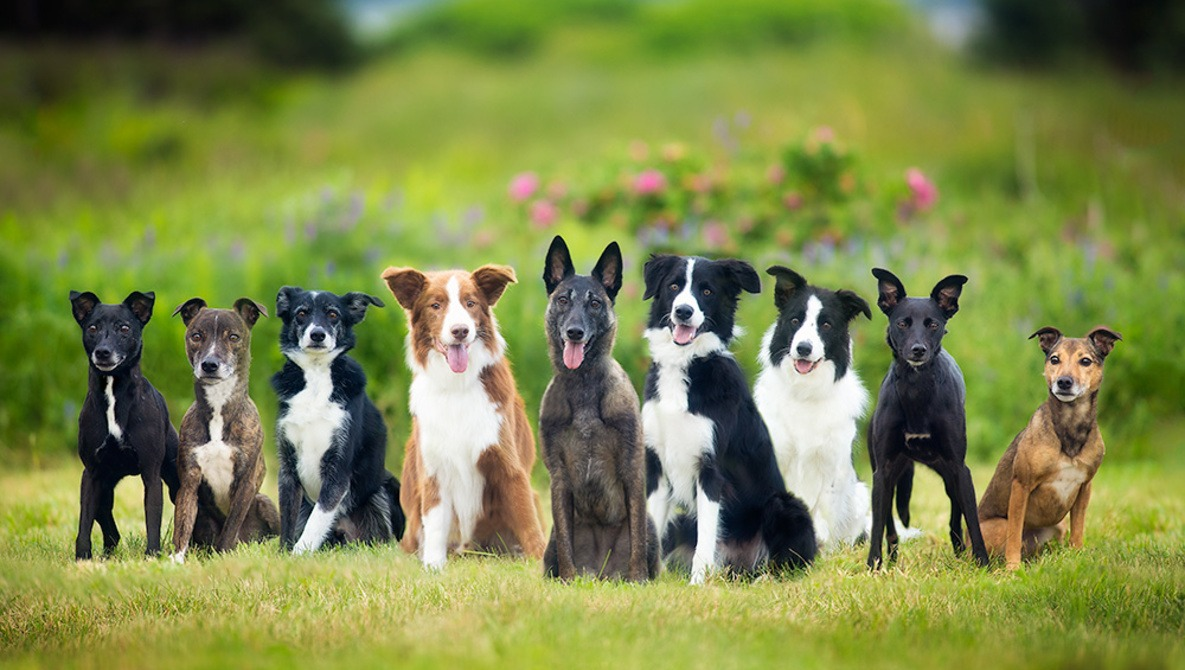

In [44]:
from IPython.display import Image
Image(filename='images/nine_dogs.jpg') 

In [45]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_image_from_file("images/nine_dogs.jpg")}},
            {"type": "text", "text": "图里面有多少只狗?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

这张图片中有9只狗。它们排成一排坐在一片绿色的草地上，背景是一片美丽的野花田野。这些狗的品种和颜色各不相同，包括黑色、棕色、白色和混色的狗。其中可以看到边境牧羊犬、澳大利亚牧羊犬等品种。每只狗都看起来很警惕，有的狗还伸出舌头。这是一张非常可爱和有趣的狗狗合影。


用Claude根据多轮对话机器人流程图生成代码
<img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240828144957.png"/>

In [47]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png", "data": get_image_from_url("https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240828144957.png")}},
            {"type": "text", "text": "按照流程图生成代码"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

根据您提供的流程图，我可以为您生成一个基本的 Python 代码框架。这个代码将模拟描述的对话过程。请注意，这是一个简化的实现，可能需要根据实际需求进行修改和扩展。

```python
class Conversation:
    def __init__(self):
        self.history = []

    def start(self):
        while True:
            user_input = self.get_user_input()
            claude_response = self.get_claude_response(user_input)
            self.display_response(claude_response)
            self.record_conversation(user_input, claude_response)

    def get_user_input(self):
        return input("用户输入: ")

    def get_claude_response(self, user_input):
        # 这里应该调用实际的 Claude API
        # 现在我们只是模拟一个简单的回复
        return f"Claude 的回复: 你说了 '{user_input}'"

    def display_response(self, response):
        print(response)

    def record_conversation(self, user_input, claude_response):
        self.history.append({"user": user_input, "claude": claude_response})

def main():
    conversation = Conversation()
    conversation.start()

if __name__ == "__main__":
    main()
```

这个代码实现了流程图中描述的主要步骤：

1

#### Claude 视觉功能优化指南

##### 图像大小

- 最佳性能：长边不超过 1568 像素，约 1600 个令牌
- 建议：调整至不超过 115 万像素
- 最小尺寸：任何边不小于 200 像素

##### 最大图像尺寸参考（不会被调整）

| 纵横比 | 图像尺寸     |
|--------|--------------|
| 1:1    | 1092x1092 px |
| 3:4    | 951x1268 px  |
| 2:3    | 896x1344 px  |
| 9:16   | 819x1456 px  |
| 1:2    | 784x1568 px  |

##### 成本计算

- 估算公式：令牌数 = (宽度像素 * 高度像素) / 750
- 示例（基于 Claude 3.5 Sonnet，3美元/百万输入令牌）

| 图像尺寸        | 令牌数  | 每张成本（美元）  | 每 1000 张成本（美元） |
|---------------|---------|-----------|------------|
| 200x200 px    | 约 54   | 约 0.00016 | 约 0.16    |
| 1000x1000 px  | 约 1334 | 约 0.004   | 约 4.00    |
| 1092x1092 px  | 约 1590 | 约 0.0048  | 约 4.80    |


##### 提示技巧

- 图像放置在文本之前效果最佳
- 多图像时，用 "Image 1:"、"Image 2:" 等介绍每张图片
- 图像间或图像与提示间不需要换行符



##### 转录手写文本

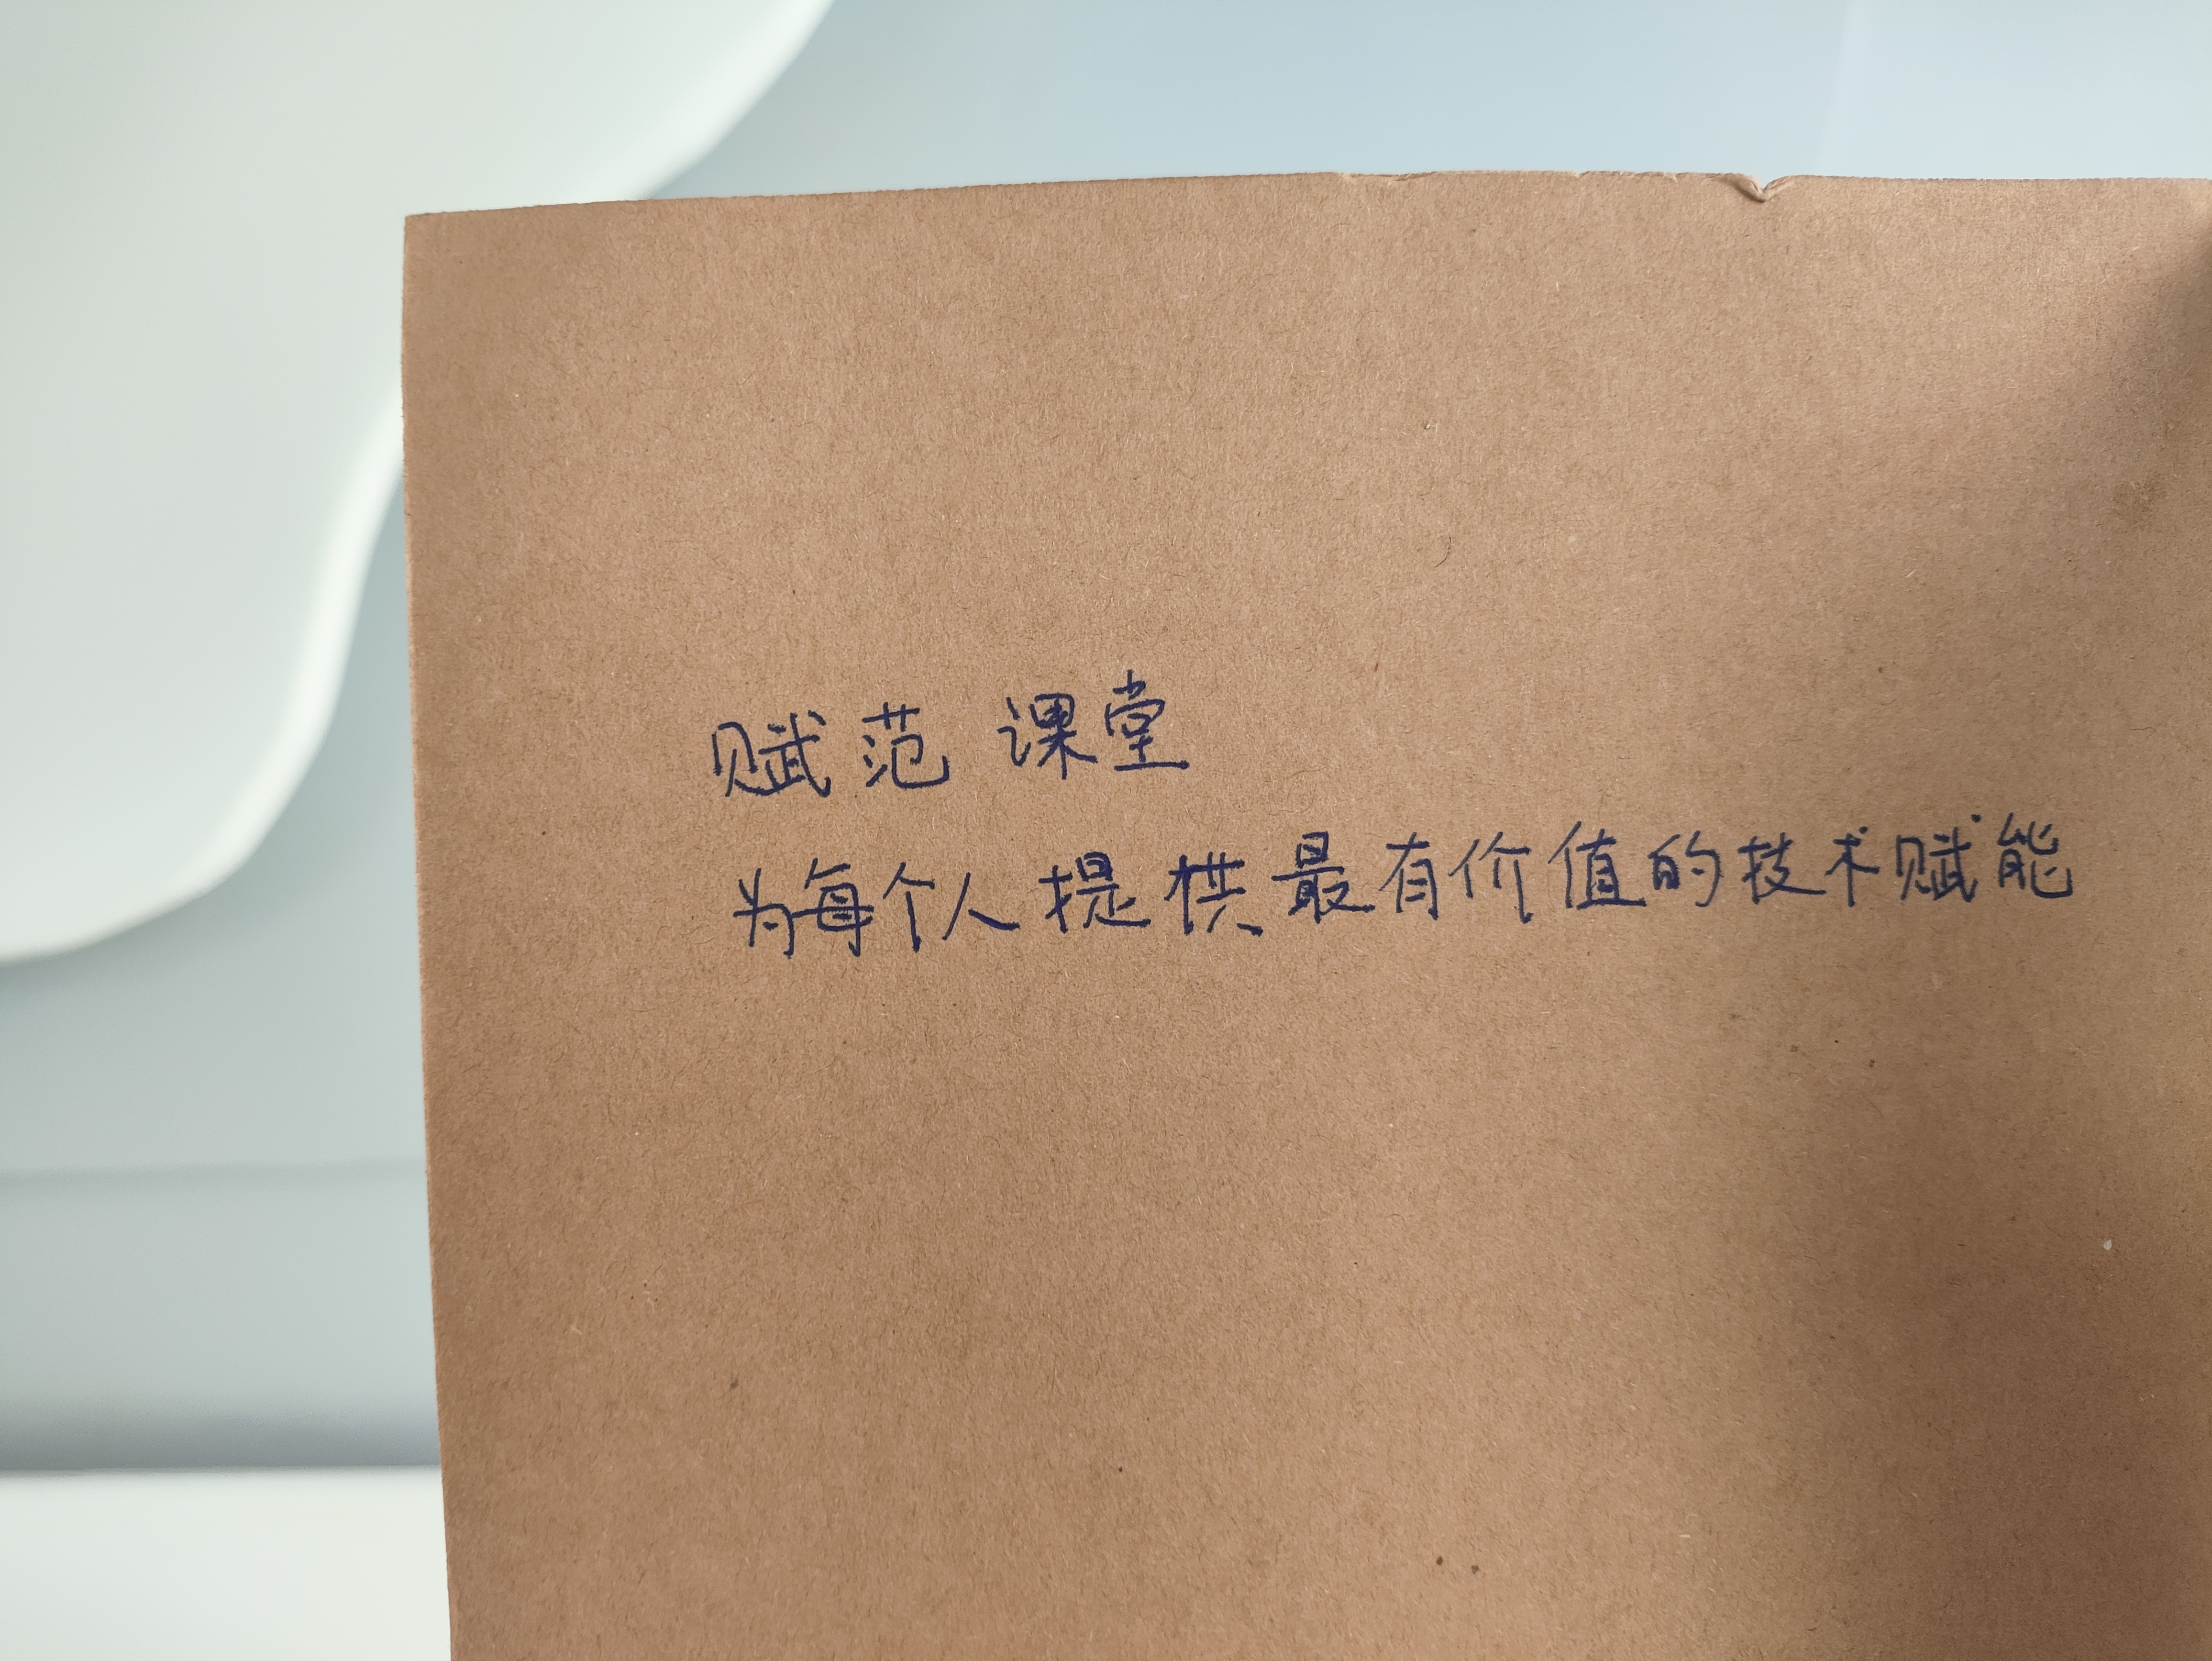

In [43]:
from IPython.display import Image
Image(filename='images/手写照片.jpg') 

In [44]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_image_from_file("images/手写照片.jpg")}},
            {"type": "text", "text": "描述上面的文字"}
        ]
    }
]

response = client.messages.create(
    model = MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

BadRequestError: Error code: 400 - {'type': 'error', 'error': {'type': 'invalid_request_error', 'message': 'messages.0.content.0.image.source.base64: image exceeds 5 MB maximum: 6806928 bytes > 5242880 bytes'}}

报错显示图像超过规定像素大小无法读取，添加图像压缩函数

In [50]:
%pip install Pillow


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


调整前的图像大小: 5105196 字节
调整后的图像大小: 933284 字节


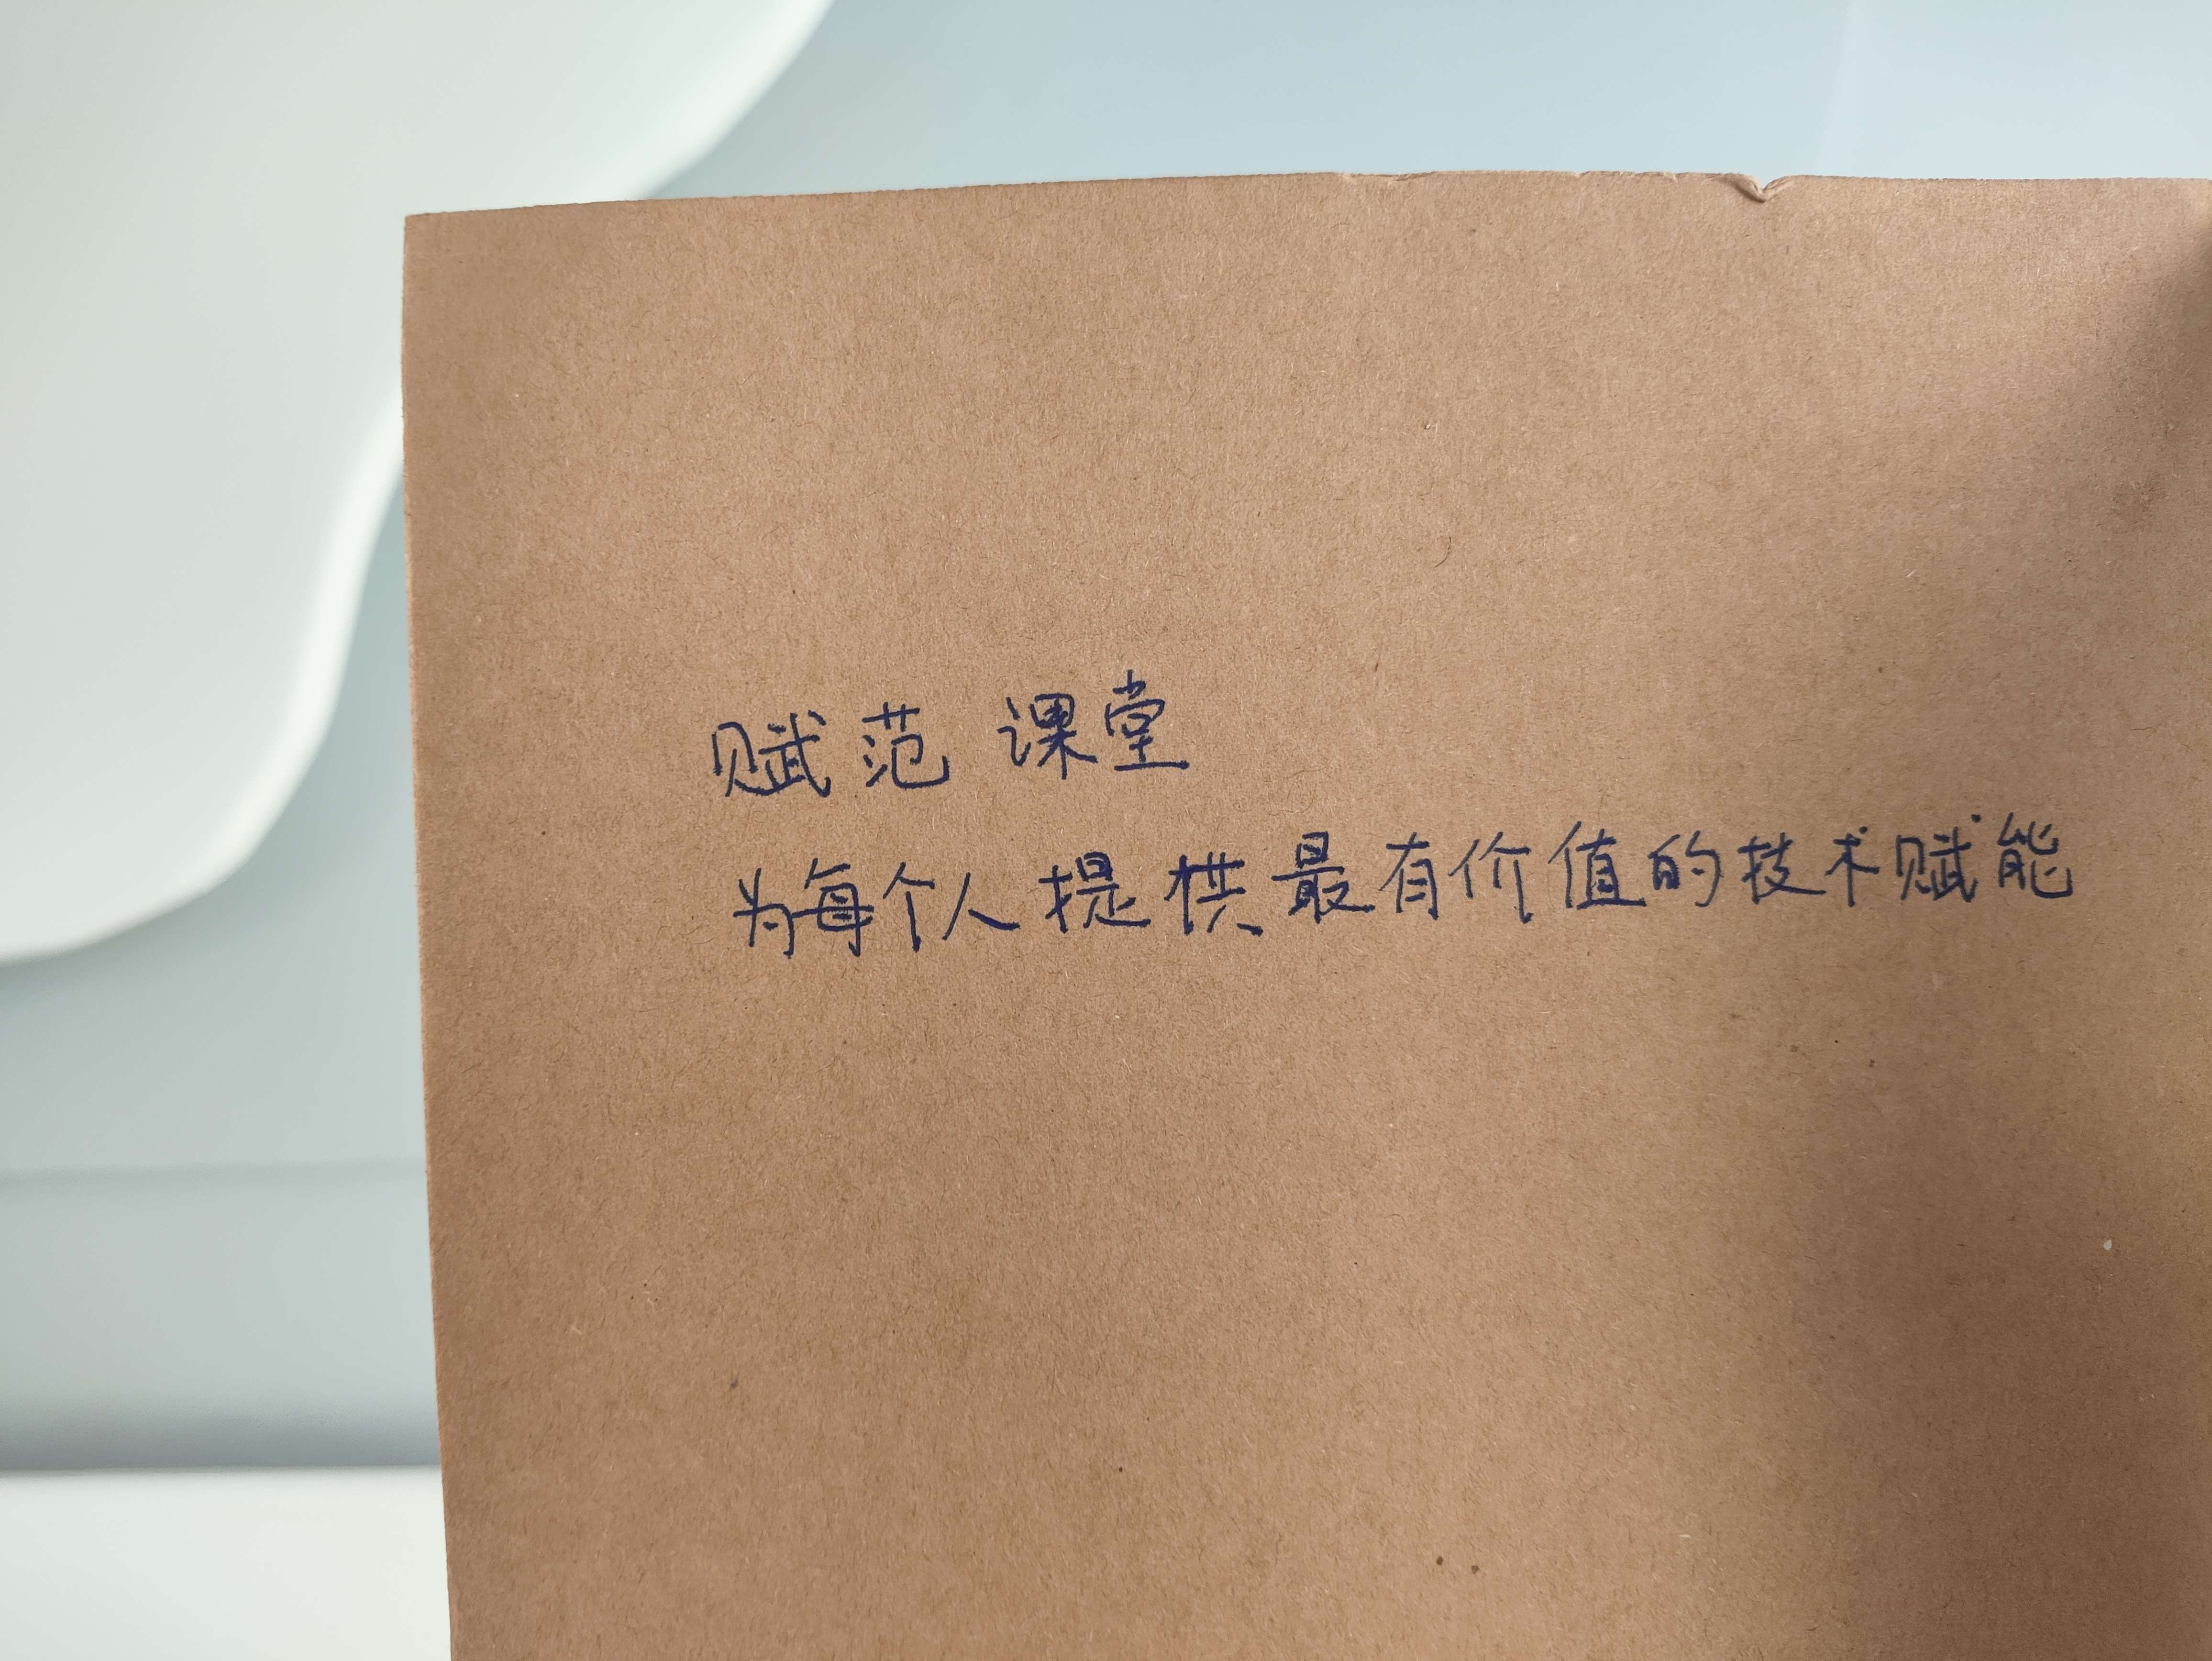

In [51]:
from PIL import Image
import os
# 打开图像文件
image_path = "images/手写照片.jpg"
image = Image.open(image_path)
# 获取原始图像的大小（字节数）
original_size = os.path.getsize(image_path)
print(f"调整前的图像大小: {original_size} 字节")
# 设定压缩后的保存路径
output_path = "images/压缩_手写照片.jpg"

# 调整图像质量并保存（quality 参数决定图像质量，范围是1-95）
image.save(output_path, "JPEG", optimize=True, quality=55)
# 获取压缩后图像的大小（字节数）
compressed_size = os.path.getsize(output_path)
print(f"调整后的图像大小: {compressed_size} 字节")
from IPython.display import Image
Image(filename='images/压缩_手写照片.jpg') 

In [52]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_image_from_file("images/压缩_手写照片.jpg")}},
            {"type": "text", "text": "描述上面的文字"}
        ]
    }
]

response = client.messages.create(
    model = MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

该笔记本的封面上写有一些中文字符。它们说:"让生活更有意义,为自己提供最有价值的人生。"这是一条非常积极、有见地的格言或人生信条,鼓励人们追求有意义的生活目标,为自己提供价值最大化的人生。这种鼓舞人心、引导正能量的文字充分展现了生活的哲学与智慧。


In [54]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": get_image_from_file("images/压缩_手写照片.jpg")}},
            {"type": "text", "text": "描述上面的文字"}
        ]
    }
]

response = client.messages.create(
    model = "claude-3-5-sonnet-20240620",
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

这张图片展示了一张棕色纸张上手写的中文文字。内容如下：

贝戏克课堂
为每个人提供最有价值的技术赋能

这段文字似乎是某个教育或培训项目的口号或宗旨。第一行"贝戏克课堂"可能是项目或机构的名称。第二行表达了该项目的目标，即为每个人提供最有价值的技术能力。这反映出一种致力于通过技术赋能来帮助个人发展的理念。

整体而言，这段文字传达了一种积极向上、注重个人发展和技能提升的信息。


#### 多图对话：提升交互体验的进阶技巧

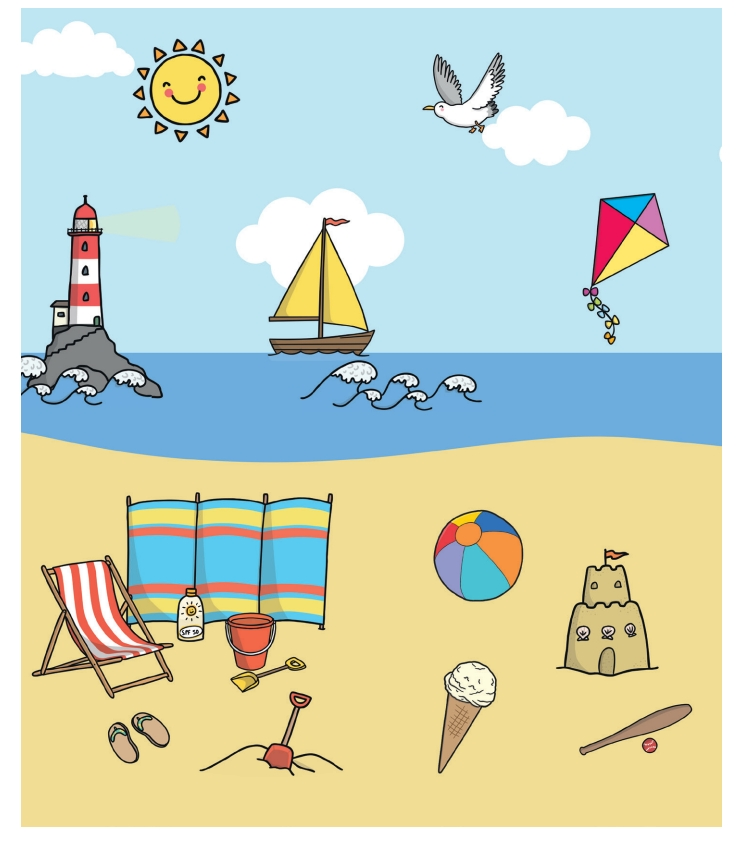

In [55]:
from IPython.display import Image
Image(filename='images/spot_diff1.jpg') 

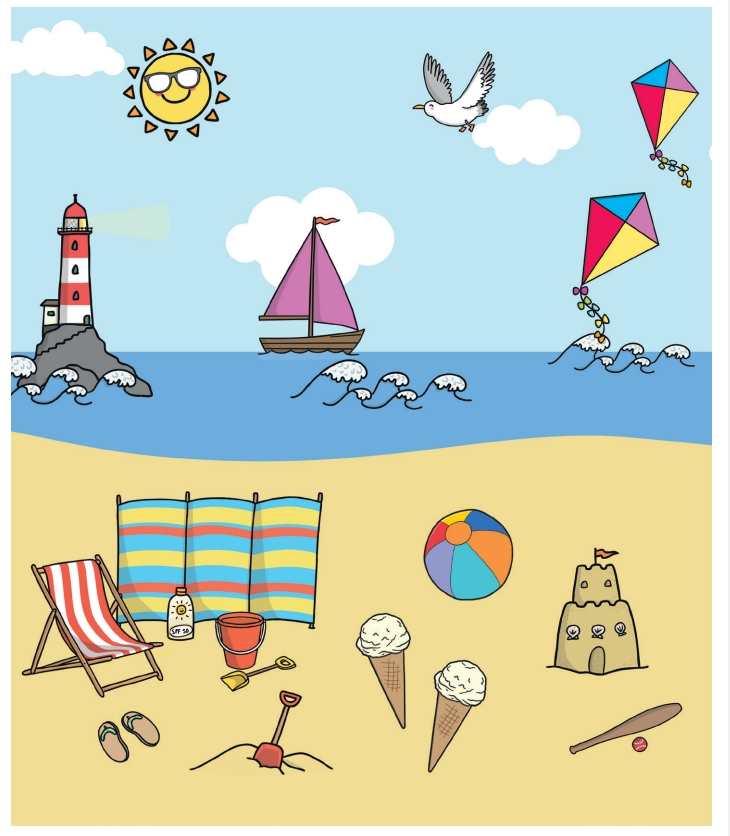

In [56]:
from IPython.display import Image
Image(filename='images/spot_diff2.jpg') 

In [8]:

message = client.messages.create(
    model = MODEL_NAME,
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "图像 1："
                },
                {
                    "type": "image",
                    "source":  {"type": "base64", "media_type": "image/jpeg", "data": get_image_from_file("images/spot_diff1.jpg")},
                },
                {
                    "type": "text",
                    "text": "图像 2："
                },
                {
                    "type": "image",
                    "source":  {"type": "base64", "media_type": "image/jpeg", "data": get_image_from_file("images/spot_diff2.jpg")},
                },
                {
                    "type": "text",
                    "text": "这些图像有什么不同？仔细的找不同"
                }
            ],
        }
    ],
)


In [9]:
print(message.content[0].text)


这两张图片很相似,但确实存在一些细微差异。仔细观察可以发现:

1. 两张图片中太阳的表情有所不同,图2中的太阳眼睛变为眼镜形状。
2. 图1中有一只小鸟飞在天空中,而图2则没有。
3. 图2中多了一些飞行的风筝,而图1只有一只飞在天空中。
4. 图2中沙滩上的冰淇淋图标数量增加了,从一个增加到了两个。

总的来说,这两张图片除了一些细节上的差异之外,整体看起来非常相似,都描绘了一个阳光明媚的海滩场景。这些微小的变化丰富了图片的内容,让我们对这个海滩场景有了更生动的想象。


### 4.精细掌控 Claude 的输出：`temperature`, `top_p`, `top_k`
| 类别                                          | 参数名称 | 类型 | 描述                                                                 |
|---------------------------------------------|----------|------|--------------------------------------------------------------------|
| 必需参数                                        | model | string | 指定要使用的 Claude 模型版本。                                        |
|                                             | messages | array | 输入对话历史和当前用户输入的消息列表，每个消息包括角色和内容。                      |
|                                             | max_tokens | integer | 生成停止前的最大令牌数。模型可能会在达到此最大值之前停止。                           |
| **可选参数**                                    |  |  |                                                                    |
|            **<span style="color:red;">生成控制</span>**                                 | <span style="color:red;">temperature</span> | <span style="color:red;">float</span> | <span style="color:red;">注入响应的随机性的程度。默认为1.0，范围从0.0到1.0。</span>                                      |
|                                             | <span style="color:red;">top_k</span> | <span style="color:red;">integer</span> | <span style="color:red;">仅从每个后续令牌的前K个选项中抽样。用于删除低概率响应的"长尾"。</span>                                |
|                                             | <span style="color:red;">top_p</span> | <span style="color:red;">float</span> | <span style="color:red;">使用核心抽样。在核心抽样中，计算所有选项的累积分布，并在达到特定概率后切断。</span>                             |
| 系统提示                                        | system | string | 系统提示。用于提供上下文和指令。                                                   |
| 停止序列                                        | stop_sequences | array | 自定义文本序列，会使模型停止生成。如果模型遇到这些序列之一，响应将提前结束。                             |
| 工具调用                                        | tool_choice | string | 模型如何使用提供的工具。可以选择特定工具，任何可用工具，或由模型自行决定。                              |
|                                             | tools | array | 定义模型可能使用的工具。每个工具定义都包括名称和输入模式。                                      |
| 流式传输参数                                      | stream | boolean | 是否使用服务器发送事件增量流式传输响应。                                               |
| 其他参数                                        | metadata | object | 描述请求的元数据。                                                          |
|                                             | anthropic-beta | string | 指定你想使用的beta版本。多个版本使用逗号分隔，不带空格。                                     |
|                                             | anthropic-version | string | 指定使用的Anthropic API的版本。                                             |
|                                             | x-api-key | string | 用于认证的独特API密钥。通过控制台获取。                                              |




#### 解密关键参数：`temperature`, `top_p`, `top_k`
##### Top_k

Top_k是从所有结果中按照打分排名，取前 k 个字作为候选集，然后从中随机选一个作为下一个输出的字：


<img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240827112245.png" alt="Image" width="1000"/>


- 模型只从这k个最可能的词中选择下一个词
- 可以有效防止模型选择非常不可能或不相关的词

Top_k可以看作是一种更严格的控制方法，特别适用于需要高度一致性输出的场景。

##### Top_p（核采样）

Top_p，也称为核采样，是挑选评分（概率）加起来达到 p的最小集合作为候选集，然后从中随机选一个作为下一个输出的字：


<img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240827112522.png" alt="Image" width="1000"/>


- 取值范围为0到1，通常设置为较高的值，比如0.75，这样可以过滤掉那些低评分的长尾。
- 模型计算所有可能的下一个词的累积概率分布
- 当累积概率达到top_p值时，模型只从这些词中选择

例如，如果top_p设为0.9，模型会考虑累积概率达到90%的词，忽略剩下的低概率词，相比于Top_k，它不用再纠结取几个字（也就是k值）作为候选集了。

这种方法在保持一定创意性的同时，可以避免完全随机或不相关的输出。

##### 温度（Temperature）

温度是控制模型生成文本随机性的关键参数。它的取值范围在0到1之间，对模型的输出有显著影响：

<img src="https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240827110341.png"/>

- 高温度（接近1.0）：
  - 使概率分布更加平滑，减小不同选项之间的概率差异，增加低概率事件被选中的机会
  - 产生更多样化、创意性的输出，适合创意写作、头脑风暴等任务
  - 可能导致不太连贯或不太相关的内容

- 低温度（接近0.0）：

  - 使概率分布更加陡峭，放大高概率选项与低概率选项之间的差异，进一步降低低概率事件被选中的可能性        
  - 生成更确定、保守的输出，适合事实性回答、分析性任务
  - 可能导致重复性较高的内容

温度参数通常是最推荐调整的，对大多数用例来说已经足够,目前默认为1。


#### Anthropic 源码注释描述揭秘

![](https://typora-photo1220.oss-cn-beijing.aliyuncs.com/DataAnalysis/LingYi/20240827120552.png)


#### 场景应用指南

1. 作用阶段
  - Temperature: 在计算概率分布时直接作用，通过调整概率分布，影响了 Top-k 和 Top-p 的候选词汇池的大小和内容。
  - Top-k/Top-p: 在概率分布计算后进行筛选，即在Temperature作用后的结果上进一步筛选控制
 
2. 主要区别：
   - Temperature直接影响整个概率分布（连续调节）
   - Top_p基于累积概率进行动态截断（离散调节）
   - Top_k基于固定数量的最可能选项进行选择（离散调节）
 
3. 一般用途：
   - 大多数情况下，只推荐temperature，创意任务用高温度，分析任务用低温度
   - Top_p适合需要平衡创意性和相关性的场景，Top_k适合需要高度可控和一致性输出的场景






In [62]:

def get_response():
    response = client.messages.create(
        model = MODEL_NAME,
        max_tokens=1024,
        top_p=1,
        messages=[
            {
                "role": "user",
                "content": "生成5款鸡尾酒的名字，要关于秋天,中文回答"
            }
        ]
    )

    return response.content
get_response()



[TextBlock(text='好的,以下是5款关于秋天的鸡尾酒名字:\n\n1. 秋日微醺 - 融合苹果、肉桂和金枪鱼酒的温暖口感。\n\n2. 枫叶飞舞 - 结合枫糖浆、伏特加和柠檬汁,带有秋日凉爽气息。\n\n3. 浓情月桂 - 运用月桂酒、香料伏特加和苹果汁,描绘秋日静谧氛围。\n\n4. 秋韵醉人 - 混合南瓜酒、白兰地和香料,营造温馨秋日风情。\n\n5. 金秋晚风 - 融合柚子酒、姜汁和百里香,展现秋日温暖与清新。\n\n希望这些鸡尾酒名称能够为您带来秋日的美好灵感!', type='text')]

In [63]:

def get_response():
    response = client.messages.create(
        model = MODEL_NAME,
        max_tokens=1024,
        temperature=0.001,
        messages=[
            {
                "role": "user",
                "content": "生成5款鸡尾酒的名字，要关于秋天,中文回答"
            }
        ]
    )

    return response.content
get_response()



[TextBlock(text='以下是5款关于秋天的鸡尾酒名字:\n\n1. 秋日微醺 - 融合了苹果、肉桂和香料的温暖醇厚的鸡尾酒。\n\n2. 枫叶飘香 - 以枫糖浆和加拿大威士忌为基底,带有一丝枫叶的香气。\n\n3. 金秋时光 - 以南瓜和香料为主调,营造出秋日的温馨氛围。\n\n4. 落叶飞舞 - 结合红酒、苹果酒和柑橘,散发出秋日的清新气息。\n\n5. 丹桂飘香 - 以丹参酒为基底,加入桂花和蜂蜜,带来秋日的优雅韵味。\n\n这些鸡尾酒名字都体现了秋天的特点,希望能给你一些灵感和参考。', type='text')]

### 5. 高级定制：系统提示 (`system`) 与停止序列 (`stop_sequences`)

| 类别                                          | 参数名称 | 类型   | 描述                                                                 |
|---------------------------------------------|----------|--------|--------------------------------------------------------------------|
| **必需参数**                                  |          |        |                                                                    |
|                                             | model    | string | 指定要使用的 Claude 模型版本。                                     |
|                                             | messages  | array  | 输入对话历史和当前用户输入的消息列表，每个消息包括角色和内容。      |
|                                             | max_tokens | integer | 回答停止前的最大令牌数。模型可能会在达到此最大值之前停止。         |
| **可选参数**                                  |          |        |                                                                    |
| 生成控制                                      | temperature | float | 注入响应的随机性的程度。默认为 1.0，范围从 0.0 到 1.0。           |
|                                             | top_k    | integer | 仅从每个后续令牌的前 K 个选项中抽样。用于删除低概率响应的"长尾"。   |
|                                             | top_p    | float  | 使用核心抽样。在核心抽样中，计算所有选项的累积分布，并在达到特定概率后切断。 |
| **系统提示**                                  | **system** | **string** | **系统提示。用于提供上下文和指令。**                                 |
| **停止序列**                                  | **stop_sequences** | **array** | **自定义文本序列，会使模型停止生成。如果模型遇到这些序列之一，响应将提前结束。** |
| 工具调用                                      | tool_choice | string | 模型如何使用提供的工具。可以选择特定工具、任何可用工具，或由模型自行决定。 |
|                                             | tools    | array  | 定义模型可能使用的工具。每个工具定义都包括名称和输入模式。         |
| 流式传输参数                                  | stream   | boolean | 是否使用服务器发送事件增量流式传输响应。                           |
| 其他参数                                      | metadata | object | 描述请求的元数据。                                                  |
|                                             | anthropic-beta | string | 指定你想使用的 beta 版本。多个版本使用逗号分隔，不带空格。         |
|                                             | anthropic-version | string | 指定使用的 Anthropic API 的版本。                                  |
|                                             | x-api-key | string | 用于认证的独特 API 密钥。通过控制台获取。                           |

#### 系统提示 `system`：塑造 Claude 的个性
系统提示是一种为 Claude 提供上下文和指令的方式，例如指定特定目标或角色。它可以用来塑造 Claude 的个性或设定特定的行为模式。

#### 停止序列 `stop_sequences`：精确控制输出
停止序列允许我们提供一组字符串，当 Claude 在生成响应时遇到这些字符串时，就会停止生成。这是一种告诉 Claude "如果你生成了这个序列，就停止生成其他内容"的方法。
- 在这个例子中，我们设置了 } 作为停止序列。这意味着 Claude 将在生成 JSON 对象的右大括号后停止生成内容，从而确保我们只获得 JSON 对象本身，而不包括任何额外的解释或评论。

In [68]:
response = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=500,
    messages=[{"role": "user", "content": "Generate a JSON object representing a person with a name, email, and phone number ."}],
    stop_sequences=["}"]
)
response

Message(id='msg_01ALpFw4dT5nYVsEsFJqgcLy', content=[TextBlock(text='Here\'s a JSON object representing a person with a name, email, and phone number:\n\n{\n  "name": "John Doe",\n  "email": "johndoe@example.com",\n  "phone": "123-456-7890"\n', type='text')], model='claude-3-haiku-20240307', role='assistant', stop_reason='stop_sequence', stop_sequence='}', type='message', usage=Usage(input_tokens=24, output_tokens=59))

- 巧妙使用停止序列可以在利用Claude强大能力的同时,有效地保护各种类型的敏感信息。这对于处理涉及隐私、商业机密或合规要求的任务特别重要。

In [70]:
message=client.messages.create(
    model = MODEL_NAME,
    max_tokens=1000,
    messages=[
        {"role": "user", "content": 
            """分析这份客户数据{
            'name': 'John Doe',
            'address': '123 Main St, Anytown, USA 12345',
            'phone_number': '(555) 555-5555',
            'email': 'johndoe@example.com',
            'social_security_number': '123-45-6789',
            'credit_card_number': '4111111111111111',
            'passport_number': 'K123456789'
        }"""
        }
    ],
    stop_sequences=["社会安全号", "信用卡号", "护照号"]
)
print(message.content[0].text)

这份客户数据包含了一些敏感的个人信息,需要小心处理。以下是一些分析:

1. 姓名、地址、电话号码和电子邮箱都是常见的客户联系信息。

2. 


### 实战指南：文档摘要

### 长上下文提示技巧

Claude的扩展上下文窗口（Claude 3模型为200K令牌）使其能够处理复杂、数据丰富的任务。以下是有效利用这一功能的关键技巧：

1. 将长篇数据放在提示的顶部，位于查询、指令和示例之上。这可以显著提高Claude在所有模型中的表现，特别是在处理复杂的多文档输入时。

2. 使用XML标签构建文档内容和元数据。用<document>标签包裹每个文档，并使用<document_content>和<source>等子标签提高清晰度。这种结构化方法有助于Claude更好地理解和处理多个文档。

3. 要求Claude在执行任务之前先引用文档中的相关部分。这有助于从文档内容中筛选出重要信息，提高回答的准确性和相关性。
### 让 Claude 思考（思维链提示）以提高性能

思维链（CoT）提示是一种强大的技术，可以显著提高 Claude 在复杂任务中的表现。通过鼓励 Claude 逐步分解问题，我们可以获得更准确、更细致的输出。这种方法特别适用于研究、分析和问题解决等复杂任务。

使用 CoT 提示可以提高准确性，减少错误，尤其是在处理数学、逻辑和分析问题时。它还能帮助 Claude 产生更加连贯和有组织的回答。此外，查看 Claude 的思考过程可以帮助我们找出提示中可能不清晰的地方，从而进行调整和改进。

然而，使用 CoT 提示也有一些注意事项。它可能会增加输出长度，从而影响响应时间。并非所有任务都需要这种深入的思考过程。因此，我们需要明智地使用 CoT，在性能提升和响应速度之间找到适当的平衡。

In [83]:

def guided_legal_summary_XML(text, max_tokens=1000):

    # Prompt the model to summarize the text
    prompt = f"""
    
    你正在查看多个相关文档的分块摘要。将以下来自不同真实来源的文档摘要合并成一个连贯的总体摘要:
    
     {text}
    
    1. 涉及的妖怪种类及特征
    2. 主要事件或故事情节
    3. 妖怪的能力或特殊之处
    4. 人类与妖怪的互动
    5. 故事中的道德寓意或主题
    6. 特殊元素(如法宝、神通、地点等)
    
    请在每个部分的XML标题内以项目符号的形式提供摘要。例如:
    
    <涉及的妖怪种类及特征>
    - 狼妖: [特征描述]
    // 根据需要添加更多详细信息
    </涉及的妖怪种类及特征>
    
    如果文档中没有明确说明任何信息，请注明"未指明"。
    
    摘要:
    """

    response = client.messages.create(
        model="claude-3-haiku-20240307",
        max_tokens=max_tokens,
        system="You are a writer，known for summaries of sublease agreements.",
        messages=[
            {
                "role": "user", 
                "content": prompt
            },
            {
                "role": "assistant",
                "content": "Here is the summary of the  document: <summary>" 
            }
        ],
        stop_sequences=["</summary>"]
    )

    return response.content[0].text

In [79]:

def guided_legal_summary(text, max_tokens=1000):

    # Prompt the model to summarize the text
    prompt = f"""
    
    你正在查看多个相关文档的分块摘要。将以下来自不同真实来源的文档摘要合并成一个连贯的总体摘要:
    
     {text}
    
    1. 涉及的妖怪种类及特征
    2. 主要事件或故事情节
    3. 妖怪的能力或特殊之处
    4. 人类与妖怪的互动
    5. 故事中的道德寓意或主题
    6. 特殊元素(如法宝、神通、地点等)
    按照这几个主题总结,用中文
    """

    response = client.messages.create(
        model="claude-3-5-sonnet-20240620",
        max_tokens=max_tokens,
        system="You are a writer，known for summaries of sublease agreements in Chinese.",
        messages=[
            {
                "role": "user", 
                "content": prompt
            },
            {
                "role": "assistant",
                "content": "Here is the summary of the  document:" 
            }
        ],
        # stop_sequences=["</summary>"]
    )

    return response.content[0].text

In [73]:
import os

# Path to the file
file_path = "documents/黑神话悟空妖怪平生录.md"

# Checking if the file exists
if os.path.exists(file_path):
    # Reading the file content
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
summary = guided_legal_summary(text)
print(summary)

 

总体来说，这些文字描述了在黄风岭一带发生的众多妖怪故事。涉及的妖怪种类多样,包括狼妖、鼠妖、蛇妖、蜘蛛精、蝙蝠精、蝎子等。这些妖怪各有特殊的能力和特征,如狼妖善于捕猎、鼠妖善于盗取、蛇妖擅长毒术等。

主要事件或故事情节包括:

1. 狼妖小狼修炼过程中的挫折和经历,最终成长为一名强大的战士。

2. 鼠妖利用人类贪婪的心理进行欺骗和偷取行为。

3. 蜘蛛精善于使用阴谋和诡计,试图伤害路人。 

4. 蝙蝠精善于隐藏与变化,擅长夜间行动。

5. 蝎子妖互相竞争权力和地位,勾心斗角。

妖怪们普遍拥有一些神奇的能力,如操控大自然元素、变化形态等。他们有时会主动接触人类,有时也会被人类招惹而起conflict。

通过这些故事,也反映了一些道德主题,如贪婪、嫉妒、报复、救赎等。有时妖怪也会表现出人性中善良温暖的一面。

总的来说,这些妖怪故事生动有趣,反映了古老神话中妖魔世界的诸多面貌。


In [84]:
import os

# Path to the file
file_path = "documents/黑神话悟空妖怪平生录.md"

# Checking if the file exists
if os.path.exists(file_path):
    # Reading the file content
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
summary = guided_legal_summary_XML(text)
print(summary)



<涉及的妖怪种类及特征>
- 狼妖: 狼族中的一个小妖，天性要强，急于求道但修为不足。他不断寻访各种妖怪学习秘法以便修炼成功。
- 鼠妖: 擅长使用弓箭和诡计,一些鼠妖被黑风大王提拔为校卫小统领或是禁卫力士。
- 石怪: 能结成人形,有吸收月华的能力,部分石怪精通战斗和法术。
- 蛇妖: 蛇群中有一些擅长使用毒液和迷惑之术的妖怪。
- 蝙蝠妖: 擅长飞行和喷吐火焰,生活在火焰山等炽热之地。
- 蝎妖: 出身贵族但互相竞争,妒忌心重,有一些掌握了毒术和控制他人的能力。
</涉及的妖怪种类及特征>

<主要事件或故事情节>
- 小狼妖寻访各妖怪学习秘法,最终被族人排斥。
- 一些鼠妖通过谄媚和奸计获得黑风大王的提拔。
- 石母为保护族人而使用了强大的石之精魄。
- 蛇妖利用毒液和迷惑之术伤害百姓。
- 蝙蝠妖在火焰山修炼成长,具备喷吐火焰的能力。
- 蝎妖家族内部充满竞争与猜忌,互相伤害。
</主要事件或故事情节>

<妖怪的能力或特殊之处>
- 狼妖善于学习各种妖法,但修为有限。
- 鼠妖擅长使用弓箭和诡计,部分还掌握了某些禁术。
- 石怪能吸收月华,部分还有强大的战力和法术。
- 蛇妖使用毒液和迷惑之术,危害百姓性命。
- 蝙蝠妖能在炽热之地生存,拥有喷吐火焰的本领。
- 蝎妖家族内部权力斗争激烈,彼此伤害。
</妖怪的能力或特殊之处>

<人类与妖怪的互动>
- 小狼妖试图通过学习各种妖法来获得提升,但最终被族人排斥。
- 一些鼠妖通过奸诈手段获得黑风大王的重用,引起其他妖怪的不满。
- 石母为了保护族人而使用了强大的石之精魄。
- 蛇妖的毒害行为给百姓带来了巨大伤害。
- 蝙蝠妖生活在火焰山中,很少与人类有直接接触。
- 蝎妖家族内部权力斗争激烈,给其他妖怪和人类带来了麻烦。
</人类与妖怪的互动>

<故事中的道德寓意或主题>
- 个人追求和集体利益之间的平衡:小狼妖为了修炼而独自寻访各处


In [74]:
import re

def parse_sections_regex(text):
    pattern = r'<(.*?)>(.*?)</\1>'
    matches = re.findall(pattern, text, re.DOTALL)
    
    parsed_sections = {}
    for tag, content in matches:
        items = [item.strip('- ').strip() for item in content.strip().split('\n') if item.strip()]
        parsed_sections[tag] = items
    
    return parsed_sections


# Parse the sections
parsed_sections = parse_sections_regex(summary)
# 格式化并打印内容
for section, details in parsed_sections.items():
    print(f"\n{section}:")
    for detail in details:
        print(f"  - {detail}")

In [75]:


system_prompt = "你是一位AI研究助手。你的任务是根据提供的内容，对相关问题提供详细的回答。"

prompt_template = '''
以下是你将要使用的文章:
<paper>
{PAPER_CONTENT}
</paper>

这是用户的问题，包含在<user_question>标签中:
<user_question>
{USER_QUESTION}
</user_question>

请按照以下步骤来组织你的回答:
1. 找出文中与回答问题最相关的引用。这些引用可以很长(甚至多个段落)。你可能需要使用多个引用来回答一个问题，包括代码片段和其他例子。
2. 按照找到的顺序给这些引用编号。
3. 基于文档和引用回答问题。尽可能直接引用文档，包括例子。
4. 回答问题时，在方括号中提供引用参考，包含在步骤2中生成的编号(找到引用的编号)。
5. 按以下格式构建输出。不要提供前言或后语:
<citations>
{{
   "citations": [
      {{
         "number": "整数",
         "passage": "字符串"
      }},
      ...
   ]
}}
</citations>

<answer>一个纯文本回答，以Markdown格式呈现[1]</answer>

现在轮到你了。首先按照描述的格式找出并输出相关引用。然后在<answer>标签内提供你对用户问题的回答。记住 - 只使用提供的论文中的信息，如果你在那里找不到答案，就让用户知道你没有那个信息。'''

In [76]:
def answer_question(user_question):
    # Generate the prompt with the user question and help center articles
    prompt = prompt_template.format(PAPER_CONTENT=text, USER_QUESTION=user_question)

    response = client.messages.create(
        model='claude-3-haiku-20240307',
        system=system_prompt,
        messages=[
            {
                'role': 'user',
                'content': prompt
            },
            {
                'role': 'assistant',
            'content': '<citations>'
            }

        ],
        max_tokens=2000,
        stop_sequences=['</answer>'],
        temperature=0
    )
    return response.content[0].text


raw_output = answer_question('讲几个的妖怪间的故事')
print(raw_output)


{
   "citations": [
      {
         "number": "1",
         "passage": "狼群中有只小妖，天性要强，终日只想赶紧得道，奈何他修炼不久，道行浅薄，无法修习族中深奥的法门，他便万分着急。"
      },
      {
         "number": "2",
         "passage": "巡山的白袍狼从过山者身上缴获了一柄宝剑。那剑，鞘缀宝石，锋刃雪亮，一看就十分贵重。白袍狼很是喜爱，便将这剑插在腰间，耍了好些威风。"
      },
      {
         "number": "3",
         "passage": "自黑熊精从南海归来，他总说得授菩萨秘法，学会了渡劫修行、起死复生的法门，许多妖魔听此传闻，便纷纷投来黑风山，跟在他门下修炼。"
      },
      {
         "number": "4",
         "passage": "巡山的小妖们很少有机会参加洞内的宴饮，美酒佳肴都得靠自己寻，他们便经常化成人形，跑去镇上骗吃骗喝。"
      },
      {
         "number": "5",
         "passage": "适逢母难日，黑风大王在禅院设宴，群妖皆至。席间，大王于崖边树梢上挂一彩头，言中者可得金丹作赏。"
      },
      {
         "number": "6",
         "passage": "昔年，狼侍卫们曾是老凌虚子的贴身随从。他们使得一手极好的长柄斧，在群妖中素负盛名。"
      },
      {
         "number": "7",
         "passage": "昔年，有个青年乃是武行教头之子。因父亲嗜酒，醉后误事，进了大牢，只剩他与母亲相依为命。"
      },
      {
         "number": "8",
         "passage": "却说这群小妖中有只嗜酒的狼妖，这日他躺在树下躲懒，朦胧间，瞧见个身披鹤氅的老狼。"
      },
      {
         "number": "9",
         "passage": "昔日，有两只青蛙一起在沼泽